In [3]:
import numpy as np
from scipy import signal
import cmath
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

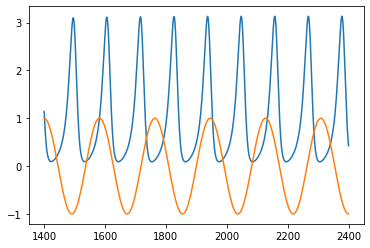

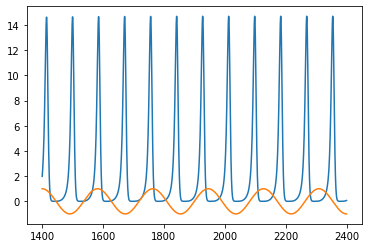

In [477]:
dur = 2400
dt = 0.1

time_ = np.arange(0,dur,dt)
amp = 0.01

aln = ALNModel()
aln.params.duration = dur
aln.params.dt = dt
aln.run()

dur = 1000
T = int(dur/dt)

t_osc = np.arange(0,dur,dt)
target_f = 0.0055
target = np.cos(2.*np.pi* target_f*t_osc)

aln_osc = []
for k in range(2):
    aln.params.mue_ext_mean = 0.16 + 0.1*k
    aln.params.mui_ext_mean = 0.1
    aln.run()
    plt.plot(aln.t[14000:], aln.rates_exc[0,14000:])
    plt.plot(t_osc+1400, target)
    plt.show()
    aln_osc.append(aln.rates_exc[0,14000:])

signal 0


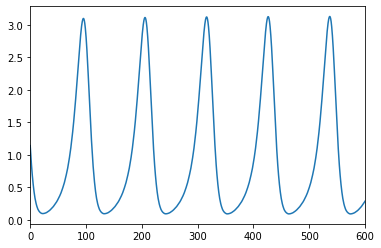

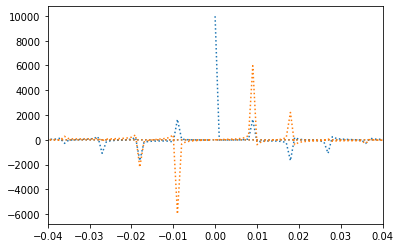

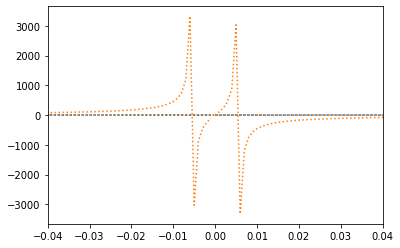

[0.46570254 0.46824196 0.47079085 0.47334907 0.47591652 0.47849296
 0.48107833 0.48367248 0.48627539 0.488887   0.4915073  0.49413626
 0.49677384 0.49941908 0.50207225 0.50473857 0.50741773 0.51010944
 0.51281348 0.51552963]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.46570254 0.46824196 0.47079085 0.47334907 0.         0.47849296
 0.48107833 0.48367248 0.48627539 0.488887   0.4915073  0.49413626
 0.49677384 0.49941908 0.50207225 0.50473857 0.         0.51010944
 0.51281348 0.51552963]


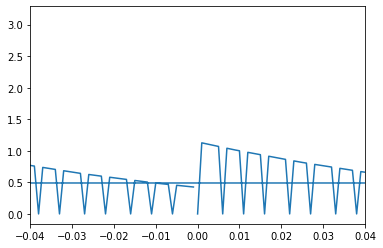

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


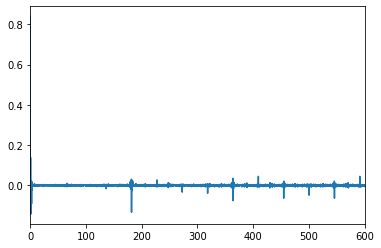

signal 0


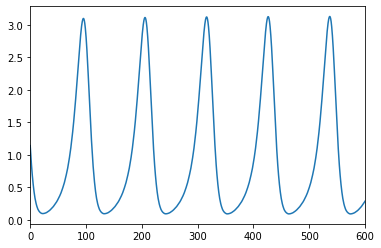

signal 1


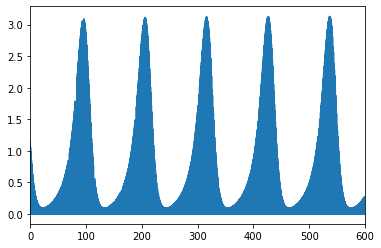

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


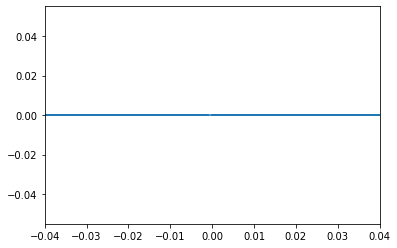

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


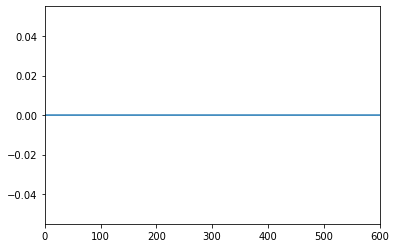

signal 0


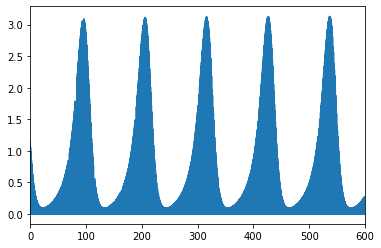

signal 1


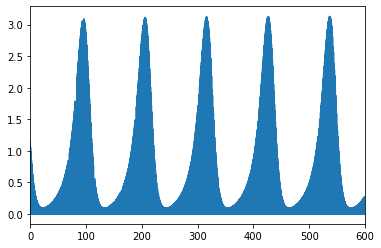

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


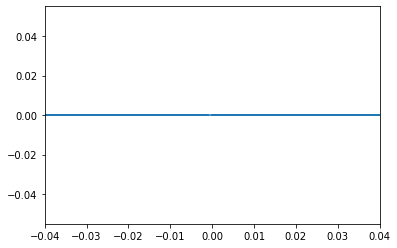

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


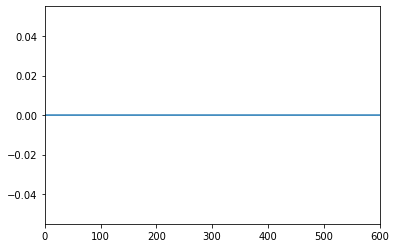

signal 0


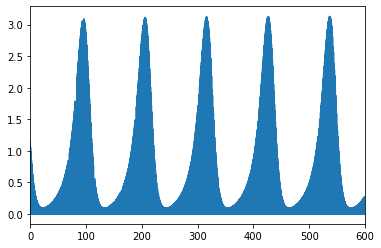

signal 1


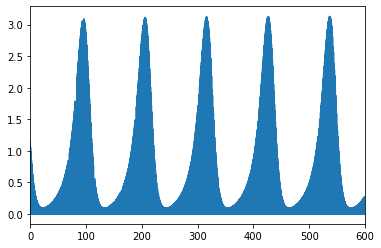

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


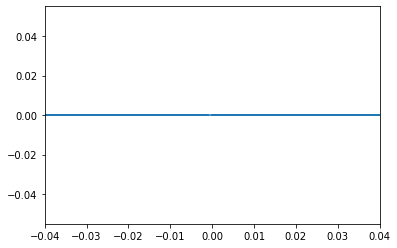

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


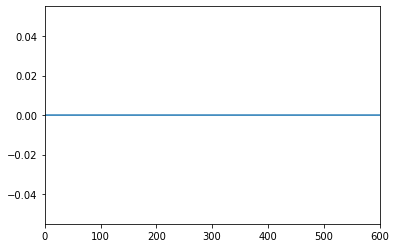

signal 0


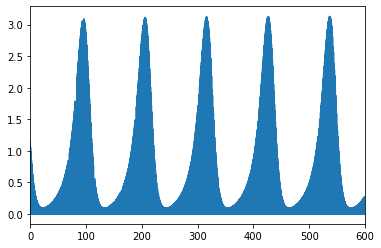

signal 1


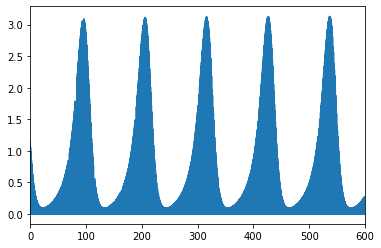

In [478]:
for sig in aln_osc:
    
    print("signal 0")
    plt.plot(t_osc, sig)
    plt.xlim(0, 600)
    plt.show()

    fft_1 = fft(sig)
    fft_2 = fft(target)
    freqs = fftfreq(T, dt)
    ind = np.where(fft_2 == np.amax(fft_2))
    plt.plot(freqs, fft_1.real, linestyle=':')
    plt.plot(freqs, fft_1.imag, linestyle=':')
    plt.xlim(-0.04, 0.04)
    plt.show()
    plt.plot(freqs, fft_2.real, linestyle=':')
    plt.plot(freqs, fft_2.imag, linestyle=':')
    plt.xlim(-0.04, 0.04)
    plt.show()
    
    sig_target = targetSpectrum(target_f, T, dt, dur)
    
    for k in range(4):
        grad = grad_domfreq(sig, target_f, T, dt, dur)
        print(sig[4990:5010])
        print(sig_target[4990:5010])
        print(grad[4990:5010])
        plt.plot(freqs, grad)
        plt.xlim(-0.04, 0.04)
        plt.show()

        print("gradient")
        grad_osc = fftpack.ifft(grad)
        plt.plot(t_osc, grad_osc)
        plt.xlim(0, 600)
        plt.show()
        
        print("signal 0")
        plt.plot(t_osc, sig)
        plt.xlim(0, 600)
        plt.show()
        
        sig -= grad
        
        print("signal 1")
        plt.plot(t_osc, sig)
        plt.xlim(0, 600)
        plt.show()
    
    """
    dom_spec = domFreqOsc(fft_1, 1)
    
    plt.plot(freqs, dom_spec.real)
    plt.plot(freqs, dom_spec.imag, linestyle=':')
    plt.xlim(-150,150)
    plt.show()
    
    x_back = fftpack.ifft(dom_spec)
    fig, ax = plt.subplots()
    ax.plot(t_osc, x_back)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Signal amplitude');
    ax.set_xlim(0, 600)
    plt.show()
    """
    
    break


In [461]:
def targetSpectrum(f_target, T, dt, dur):
    target_spectrum = np.zeros((T))
    freqs = fftfreq(T, dt)
    m = 0.
    while m * f_target < np.amax(freqs):
        freq = round(m*f_target*dur,0)/dur 
        #print(m, freq)
        target_spectrum[np.where(freqs==freq)] = 1.
        target_spectrum[np.where(freqs==-freq)] = 1.
        m += 1
        
    return target_spectrum

def grad_domfreq(spectrum, f_target, T, dt, dur):
    grad = np.zeros((spectrum.shape))
    target_spectrum = targetSpectrum(f_target, T, dt, dur)
    
    for t in range(T):
        if np.abs(spectrum[t]) > 1. and np.abs(target_spectrum[t]) == 0.:
            # frequency is present in signal, but is not supposed to be
            grad[t] = spectrum[t]
        elif np.abs(spectrum[t]) == 0. and np.abs(target_spectrum[t]) > 0.:
            # frequency is not present in sepctrum, but should be
            grad[t] = - dur
        
    return grad
    

def domFreqOsc(spectrum, n):
    dom_spec = np.zeros((spectrum.shape)).astype(complex)
    indmax = np.where(np.abs(spectrum) == np.amax(np.abs(spectrum)))
    dom_spec[indmax] = spectrum[indmax]
    
    h = 1. * np.amax(np.abs(spectrum))
    peaks_r = signal.find_peaks(np.abs(spectrum.real), height=h)
    peaks_i = signal.find_peaks(np.abs(spectrum.imag), height=h)
    
    while len(peaks_r[0]) + len(peaks_i[0]) < n:
        h *= 0.9
        peaks_r = signal.find_peaks(np.abs(spectrum.real), height=h)
        peaks_i = signal.find_peaks(np.abs(spectrum.imag), height=h)        
        
    for i in range(len(peaks_r[0])):
        dom_spec[int(peaks_r[0][i])] += spectrum.real[int(peaks_r[0][i])]
        
    for i in range(len(peaks_i[0])):
        dom_spec[int(peaks_i[0][i])] += spectrum.imag[int(peaks_i[0][i])] * complex(0,1)
        
    return dom_spec
    
    

def fTarget(target_f, a, dur, dt):
    f_target = np.zeros((int(dur/dt)))
    freqs = fftpack.fftfreq(len(f_target)) / dt
    factor = dur/dt
    
    f_target[np.where(freqs==target_f)] = factor * a * complex(1,0)
    f_target[np.where(freqs==-target_f)] = factor * a * complex(1,0)
        
    return f_target

def F_freq(signal, target, dt):
    X = fftpack.fft(signal)
    freqs = fftpack.fftfreq(len(X)) / dt
    df = freqs[1] - freqs[0]
    
    F = 0.
    for i in range(len(X)):
        F += df * (target[i] - np.abs(X[i]))**2
    
    return F

def F_freq_grad(signal, target_f, width, dt, ds):
    grad = np.zeros((signal.shape))
    signal_ds = signal.copy()
    target = fTarget(target_f, width, dur, dt)
    F0 = F_freq(signal, target, dt)
    
    for i in range(len(signal)):
        signal_ds[i] += ds
        F_ds = F_freq(signal_ds, target, dt)
        signal_ds[i] -= ds
        grad[i] = (F_ds - F0 ) / ds
        
    return grad

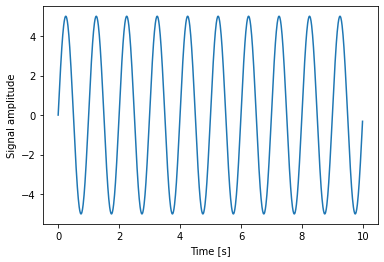

(-6.797966503956368e-15-3.535789881292208e-14j) (-6.797966503956368e-15+3.535789881292208e-14j)


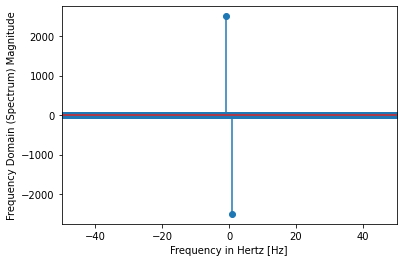

DEFINE FREQ SPECTRUM


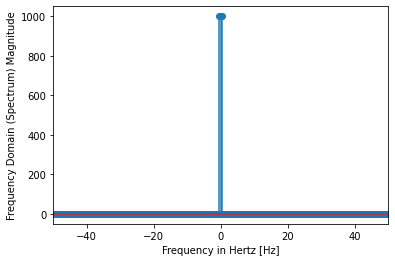

/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


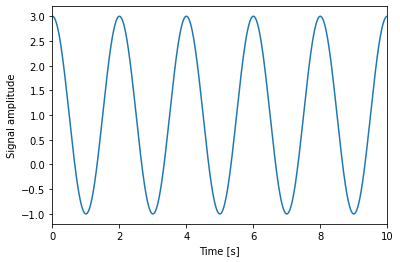

In [186]:
f = 1  # Frequency, in cycles per second, or Hertz
dur = 10.
amp = 5.
dt = 0.01
f_s = int(1./dt)  # Sampling rate, or number of measurements per second


t = np.arange(0, dur, dt)
x = amp * np.sin(f * 2. * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
plt.show()

from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, X.imag)
print(X[20], X[-20])
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
plt.show()

print("DEFINE FREQ SPECTRUM")
freq_spec = np.zeros((X.shape)).astype(complex)
freq_spec[np.where(freqs==0.5)] = complex(1,0) * int(dur/dt)
freq_spec[np.where(freqs==-0.5)] = complex(1,0) * int(dur/dt)
freq_spec[np.where(freqs==0.)] = complex(1,0) * int(dur/dt)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(freq_spec))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
plt.show()

x_back = fftpack.ifft(freq_spec)
fig, ax = plt.subplots()

ax.plot(t, x_back)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, dur)
#ax.set_ylim(-5, 110)
plt.show()

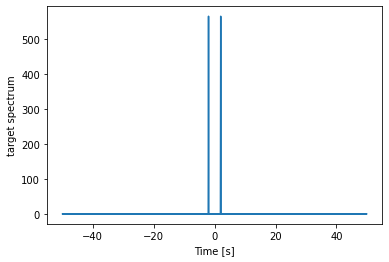

/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


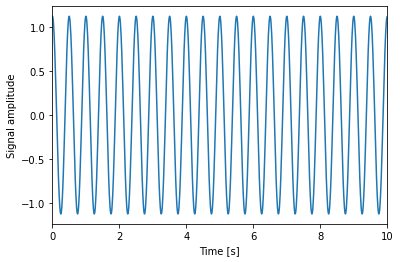

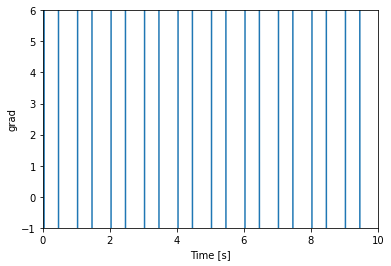

In [232]:
f_target = 2.
ds = 0.1
width = 0.001

f_target_array = fTarget(f_target, width, dur, dt)

fig, ax = plt.subplots()
ax.plot(freqs, f_target_array)
ax.set_xlabel('Time [s]')
ax.set_ylabel('target spectrum')
plt.show()

x_back = fftpack.ifft(f_target_array)
fig, ax = plt.subplots()
ax.plot(t, x_back)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, dur)
plt.show()

grad = F_freq_grad(x, f_target, width, dt, ds)



fig, ax = plt.subplots()
ax.plot(t, grad)
ax.set_xlabel('Time [s]')
ax.set_ylabel('grad');
ax.set_xlim(0, dur)
ax.set_ylim(-1,6)
plt.show()

In [188]:
duration = 3.*np.pi
dt = 0.01
time = np.arange(0,duration, dt)
freq = 1.

def mean_abs(f):
    return np.mean(np.abs(f))

def cost_integrand(f, td_n):
    integrand = np.zeros(( len(f) - td_n))
    for t in range(len(integrand)):
        integrand[t] = (f[t+td_n] * f[t]) / np.var(f)
    return integrand

def cost(d_dt, f):
    cost = 0.
    integrand = cost_integrand(f, d_dt)
    for t_ in range(len(integrand)):
        cost += integrand[t_] * dt
    return cost

def derSignal_num(signal, ds, cost0, d_dt):
    s0 = signal.copy()
    s1 = s0.copy()
    der_ = np.zeros((signal.shape))
    for t in range(d_dt, len(signal),1):
        s1[t] += ds
        cost1 = cost(d_dt, s1)
        der_[t] = (cost1 - cost0) / ds
        s1[t] -= ds
        
    return der_

def derSignal(signal, d_dt):
    der_ = np.zeros((signal.shape))
    for t in range(d_dt, len(signal)-d_dt,1):
        der_[t] = signal[t-d_dt] / np.var(signal)
        
    return der_

def bisection_min(f, d_dt, der_signal, cost0):
    step = 10.
    factor = 0.5
    limitstep = 1e-8
    
    f1 = f - step * der_signal
    cost1 = cost(d_dt, f1)
    
    print(cost0, cost1)
    
    while cost0 < cost1:
        print(step, cost0, cost1)
        step *= factor
        f1 = f - step * der_signal
        cost1 = cost(d_dt, f1)
        if step < limitstep:
            return 0        
        
    f2 = f - step * factor * der_signal
    cost2 = cost(d_dt, f2)
    
    print(step, cost0, cost1, cost2)
    
    while cost2 < cost1:
        print(step, cost0, cost1, cost2)
        cost1 = cost2.copy()
        step *= factor
        cost2 = cost(d_dt, f - step * factor * der_signal)
        if step < limitstep:
            return step     
        
    return step

def bisection_max(f, d_dt, der_signal, cost0):
    step = 1.
    factor = 2.
    limitstep = 1e8
    
    f1 = f + step * der_signal
    cost1 = cost(d_dt, f1)
    
    print(cost0, cost1)
    
    while cost0 > cost1:
        print(step, cost0, cost1)
        step *= factor
        f1 = f + step * der_signal
        cost1 = cost(d_dt, f1)
        if step > limitstep:
            return 0        
        
    f2 = f + step * factor * der_signal
    cost2 = cost(d_dt, f2)
    
    print(step, cost0, cost1, cost2)
    
    while cost2 > cost1:
        print(step, cost0, cost1, cost2)
        cost1 = cost2.copy()
        step *= factor
        cost2 = cost(d_dt, f + step * factor * der_signal)
        if step > limitstep:
            return step     
        
    return step

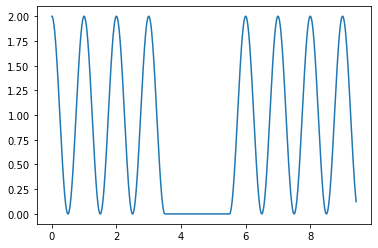

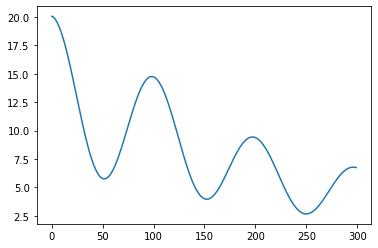

20.07733867257273 (array([0]),) [0.]


In [185]:
f_ = np.cos(freq * 2. * np.pi * time) + 1.
f_[350:550] = 0.
plt.plot(time, f_)
plt.show()

cost_d = np.zeros((300))
for t in range(cost_d.shape[0]):
    cost_d[t] = cost(t, f_)
    
plt.plot(cost_d)
plt.show()

max_cost = np.amax(cost_d)
max_ind = np.where(cost_d==max_cost)
shift = max_ind[0] * dt
print(max_cost, max_ind, shift)

100


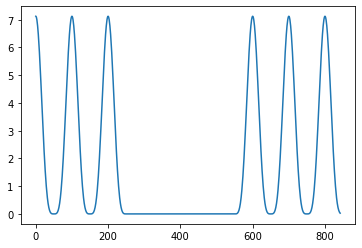

In [186]:
target_delay = 1.0
target_delay_n = np.around(target_delay / dt,1).astype(int)
print(target_delay_n)

f_integrand = cost_integrand(f_, target_delay_n)
plt.plot(f_integrand)

--------------- 0
cost =  14.73279876528014
14.73279876528014 15.52609065891349
1.0 14.73279876528014 15.52609065891349 13.46241234191752
step =  1.0


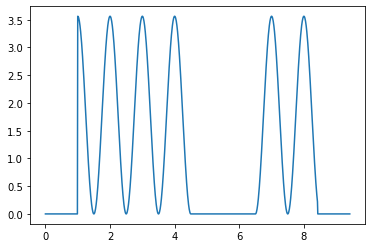

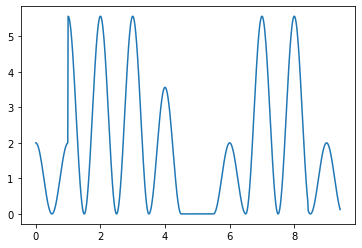

--------------- 1
cost =  15.52609065891349
15.52609065891349 19.94882230208061
1.0 15.52609065891349 19.94882230208061 18.69216931518505
step =  1.0


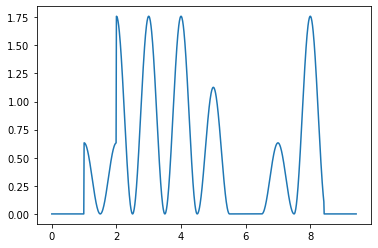

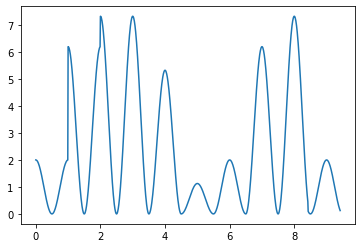

--------------- 2
cost =  15.944277071354556
15.944277071354556 20.753565087329342
1.0 15.944277071354556 20.753565087329342 20.70911324169743
step =  1.0


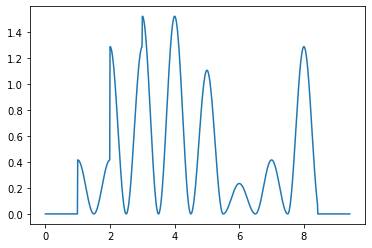

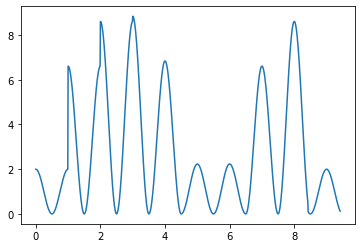

In [189]:
step = 0.1
ds = 0.1
f0 = f_.copy()

for k in range(3):
    print("---------------", k)
    
    cost0 = cost(target_delay_n, f0)
    print("cost = ", cost0)
    
    der_signal = derSignal(f0, target_delay_n)
    #der_signal_num = derSignal_num(f0, ds, cost0, target_delay_n)
    
    #plt.plot(der_signal - der_signal_num)
    #plt.show()
    #break
    
    step = bisection_max(f_, target_delay_n, der_signal, cost0)
    print("step = ", step)
    f0 += step * der_signal
    
    if k%1 == 0:
        plt.plot(time, der_signal)
        plt.show()
        plt.plot(time, f0)
        plt.show()

--------------- 0
cost =  16.17211717494998
16.17211717494998 20.948756193741456
1.0 16.17211717494998 20.948756193741456 21.800066269740288
1.0 16.17211717494998 20.948756193741456 21.800066269740288
step =  2.0


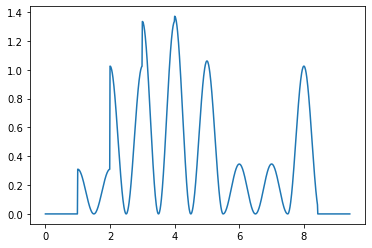

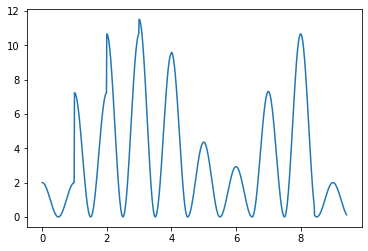

--------------- 1
cost =  16.34201757795242
16.34201757795242 20.700218130428702
1.0 16.34201757795242 20.700218130428702 22.666335891870077
1.0 16.34201757795242 20.700218130428702 22.666335891870077
step =  2.0


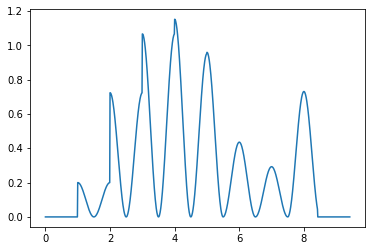

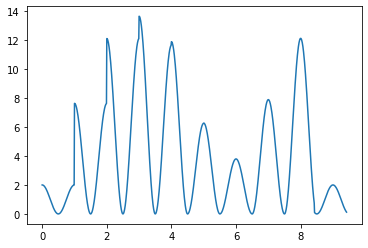

--------------- 2
cost =  16.503454815742078
16.503454815742078 20.307235341175467
1.0 16.503454815742078 20.307235341175467 22.78443813620599
1.0 16.503454815742078 20.307235341175467 22.78443813620599
step =  2.0


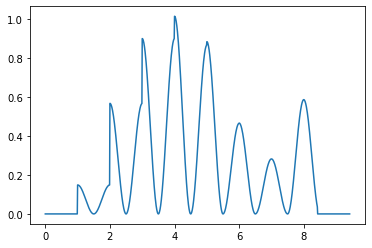

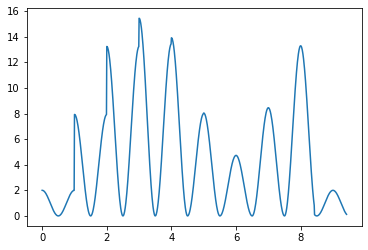

--------------- 3
cost =  16.63352108511173
16.63352108511173 19.92545636004683
1.0 16.63352108511173 19.92545636004683 22.63669440356925
1.0 16.63352108511173 19.92545636004683 22.63669440356925
2.0 16.63352108511173 22.63669440356925 23.072170452897637
step =  4.0


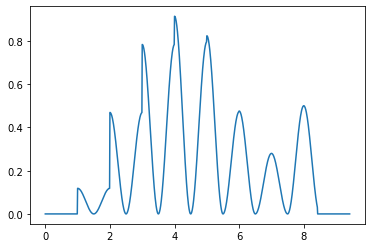

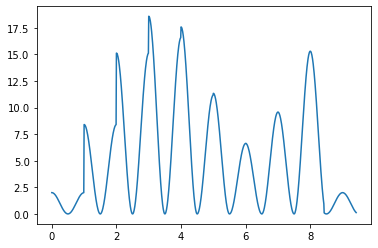

--------------- 4
cost =  16.759154317859927
16.759154317859927 19.252888242929153
1.0 16.759154317859927 19.252888242929153 22.08416470062041
1.0 16.759154317859927 19.252888242929153 22.08416470062041
2.0 16.759154317859927 22.08416470062041 23.43779545376169
step =  4.0


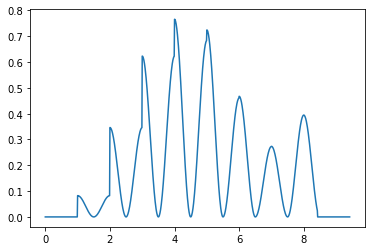

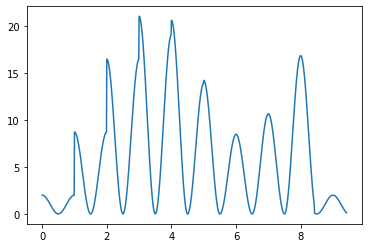

--------------- 5
cost =  16.846400270601528
16.846400270601528 18.75663827854185
1.0 16.846400270601528 18.75663827854185 21.523512823782728
1.0 16.846400270601528 18.75663827854185 21.523512823782728
2.0 16.846400270601528 21.523512823782728 23.39582616081533
step =  4.0


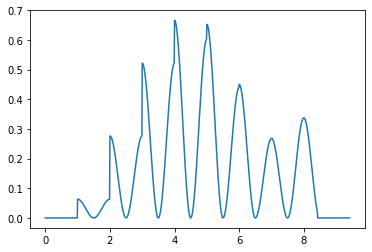

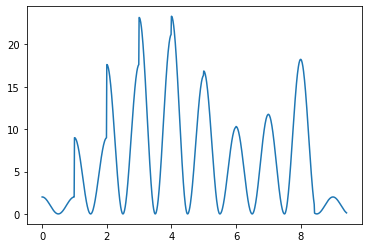

--------------- 6
cost =  16.90069453843711
16.90069453843711 18.375692330252676
1.0 16.90069453843711 18.375692330252676 21.02823039946449
1.0 16.90069453843711 18.375692330252676 21.02823039946449
2.0 16.90069453843711 21.02823039946449 23.20057750857061
step =  4.0


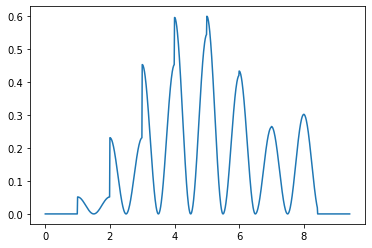

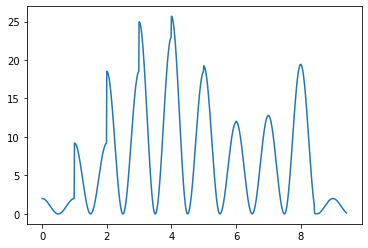

--------------- 7
cost =  16.932028275858304
16.932028275858304 18.07335359227525
1.0 16.932028275858304 18.07335359227525 20.602119414832593
1.0 16.932028275858304 18.07335359227525 20.602119414832593
2.0 16.932028275858304 20.602119414832593 22.947911283322483
step =  4.0


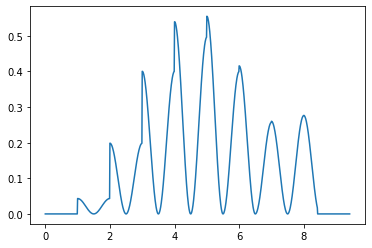

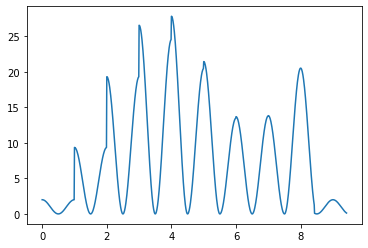

--------------- 8
cost =  16.947703295229584
16.947703295229584 17.826886547479628
1.0 16.947703295229584 17.826886547479628 20.23596022685944
1.0 16.947703295229584 17.826886547479628 20.23596022685944
2.0 16.947703295229584 20.23596022685944 22.678682852017825
step =  4.0


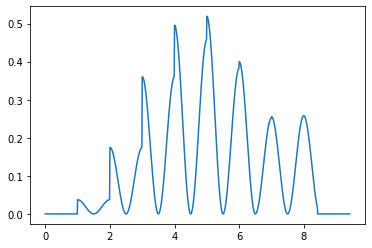

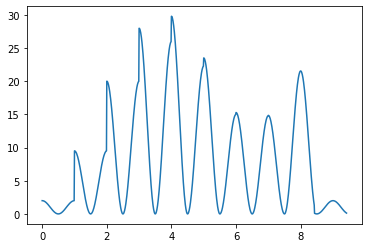

--------------- 9
cost =  16.952608880455067
16.952608880455067 17.62157530959474
1.0 16.952608880455067 17.62157530959474 19.919387115899656
1.0 16.952608880455067 17.62157530959474 19.919387115899656
2.0 16.952608880455067 19.919387115899656 22.41126157747197
4.0 16.952608880455067 22.41126157747197 22.603849261100375
step =  8.0


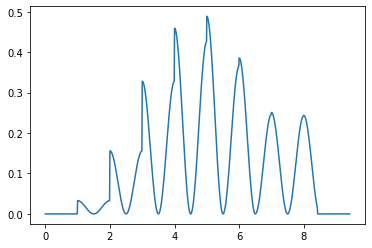

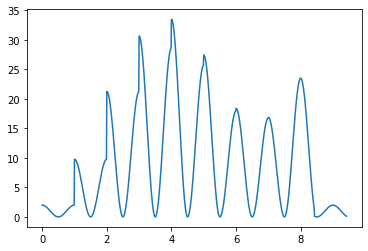

In [190]:
for k in range(10):
    print("---------------", k)
    
    cost0 = cost(target_delay_n, f0)
    print("cost = ", cost0)
    
    der_signal = derSignal(f0, target_delay_n)
    
    step = bisection_max(f_, target_delay_n, der_signal, cost0)
    print("step = ", step)
    f0 += step * der_signal
    
    if k%1 == 0:
        plt.plot(time, der_signal)
        plt.show()
        plt.plot(time, f0)
        plt.show()

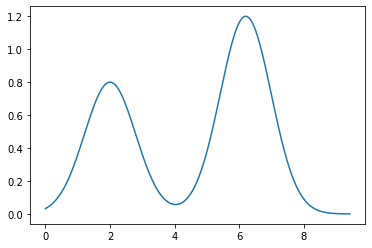

400


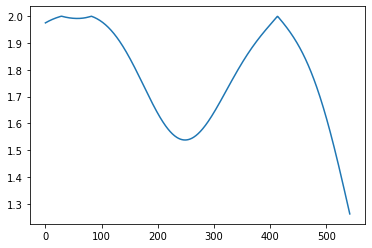

In [130]:
signal_2 = 0.8 * np.exp(- 0.8 * (2.-time)**2)
signal_2 += 1.2 * np.exp(- 0.8 * (6.2-time)**2)
plt.plot(time, signal_2)
plt.show()

target_delay = 4.
target_delay_n = np.around(target_delay / dt,1).astype(int)
print(target_delay_n)

f_integrand = cost_integrand(signal_2, target_delay_n)
plt.plot(f_integrand)

--------------- 0
cost =  9.705352880093153
9.705352880093153 9.81314004607433
10.0 9.705352880093153 9.81314004607433
5.0 9.705352880093153 10.336570023037162
2.5 9.705352880093153 10.59828501151856
1.25 9.705352880093153 10.729142505759294
0.625 9.705352880093153 10.79457125287965
0.3125 9.705352880093153 10.827285626439862
0.15625 9.705352880093153 10.843642813219995
0.078125 9.705352880093153 10.85182140660995
0.0390625 9.705352880093153 10.855910703304996
0.01953125 9.705352880093153 10.857955351652448
0.009765625 9.705352880093153 10.858977675826306
0.0048828125 9.705352880093153 10.859488837913117
0.00244140625 9.705352880093153 10.85974441895664
0.001220703125 9.705352880093153 10.859872209478324
0.0006103515625 9.705352880093153 10.859936104739123
0.00030517578125 9.705352880093153 10.85996805236963
0.000152587890625 9.705352880093153 10.859984026184723
7.62939453125e-05 9.705352880093153 10.859992013092311
3.814697265625e-05 9.705352880093153 10.859996006546185
1.907348632812

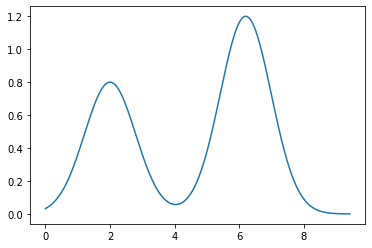

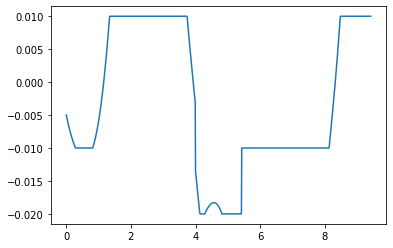

--------------- 1
cost =  9.705352880093153
9.705352880093153 9.81314004607433
10.0 9.705352880093153 9.81314004607433
5.0 9.705352880093153 10.336570023037162
2.5 9.705352880093153 10.59828501151856
1.25 9.705352880093153 10.729142505759294
0.625 9.705352880093153 10.79457125287965
0.3125 9.705352880093153 10.827285626439862
0.15625 9.705352880093153 10.843642813219995
0.078125 9.705352880093153 10.85182140660995
0.0390625 9.705352880093153 10.855910703304996
0.01953125 9.705352880093153 10.857955351652448
0.009765625 9.705352880093153 10.858977675826306
0.0048828125 9.705352880093153 10.859488837913117
0.00244140625 9.705352880093153 10.85974441895664
0.001220703125 9.705352880093153 10.859872209478324
0.0006103515625 9.705352880093153 10.859936104739123
0.00030517578125 9.705352880093153 10.85996805236963
0.000152587890625 9.705352880093153 10.859984026184723
7.62939453125e-05 9.705352880093153 10.859992013092311
3.814697265625e-05 9.705352880093153 10.859996006546185
1.907348632812

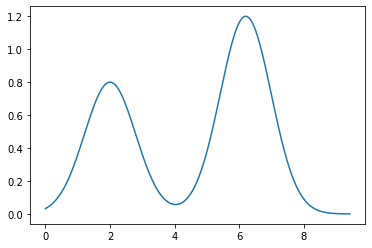

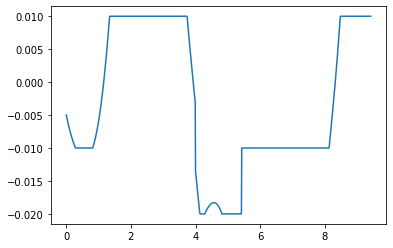

--------------- 2
cost =  9.705352880093153
9.705352880093153 9.81314004607433
10.0 9.705352880093153 9.81314004607433
5.0 9.705352880093153 10.336570023037162
2.5 9.705352880093153 10.59828501151856
1.25 9.705352880093153 10.729142505759294
0.625 9.705352880093153 10.79457125287965
0.3125 9.705352880093153 10.827285626439862
0.15625 9.705352880093153 10.843642813219995
0.078125 9.705352880093153 10.85182140660995
0.0390625 9.705352880093153 10.855910703304996
0.01953125 9.705352880093153 10.857955351652448
0.009765625 9.705352880093153 10.858977675826306
0.0048828125 9.705352880093153 10.859488837913117
0.00244140625 9.705352880093153 10.85974441895664
0.001220703125 9.705352880093153 10.859872209478324
0.0006103515625 9.705352880093153 10.859936104739123
0.00030517578125 9.705352880093153 10.85996805236963
0.000152587890625 9.705352880093153 10.859984026184723
7.62939453125e-05 9.705352880093153 10.859992013092311
3.814697265625e-05 9.705352880093153 10.859996006546185
1.907348632812

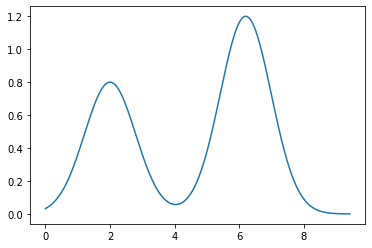

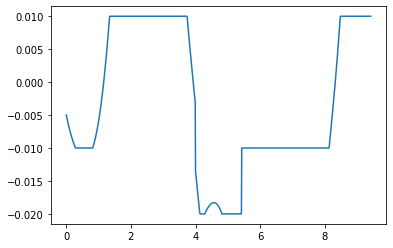

In [131]:
step = 0.1
ds = 0.1
f0 = signal_2.copy()

for k in range(3):
    print("---------------", k)
    
    cost0 = cost(target_delay_n, f0)
    print("cost = ", cost0)
    
    der_signal = derSignal(f0, ds, cost0, target_delay_n)
    step = bisection(f_, target_delay_n, der_signal, cost0)
    print("step = ", step)
    f0 += step * der_signal
    
    if k%1 == 0:
        plt.plot(time, f0)
        plt.show()
        plt.plot(time, der_signal)
        plt.show()